<a href="https://colab.research.google.com/github/developer-amna/-OOPs_using_cpp/blob/main/ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK # 1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart-disease-data.csv to heart-disease-data (1).csv


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("heart-disease-data.csv")

# Check missing values
print(df.isnull().sum())

# Check duplicate records
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Dataset information
df.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
1
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Explanation
In this task, the dataset is loaded using Pandas. Missing values and duplicate records are checked. Duplicate entries are removed to ensure data quality and reliability before analysis and model training.
🔸 Reasoning Questions
1. Why is data cleaning a critical step before EDA and model training?
Data cleaning is important because medical datasets may contain errors or duplicate records. If the data is not clean, the analysis and predictions can be inaccurate and misleading.
2. What problems can incorrect or missing medical data cause in predictions?
Incorrect or missing data can lead to wrong diagnosis, low model accuracy, and unreliable predictions, which is dangerous in healthcare applications.
3. Which cleaning decision had the biggest impact on your dataset?
Removing duplicate records had the biggest impact because duplicates can bias the model and affect prediction accuracy.

TASK # 2

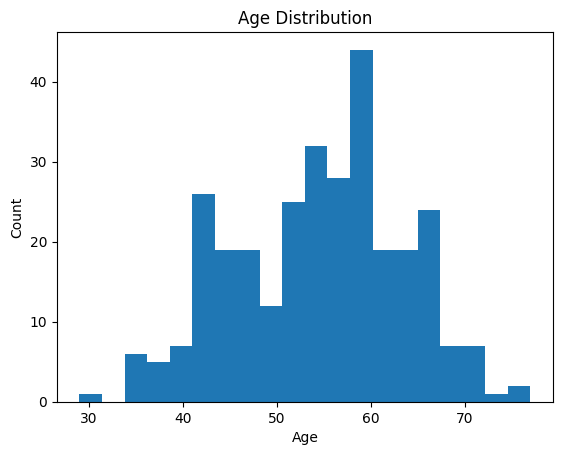

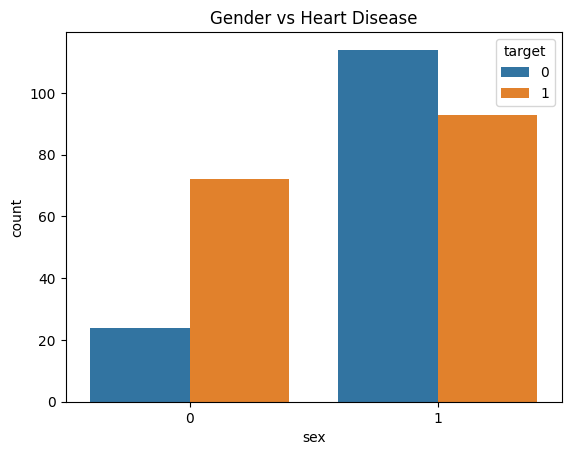

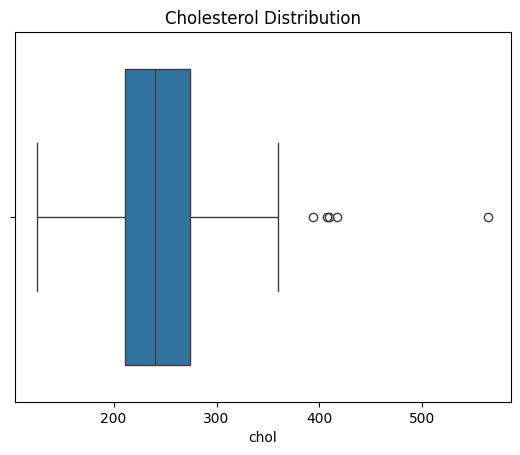

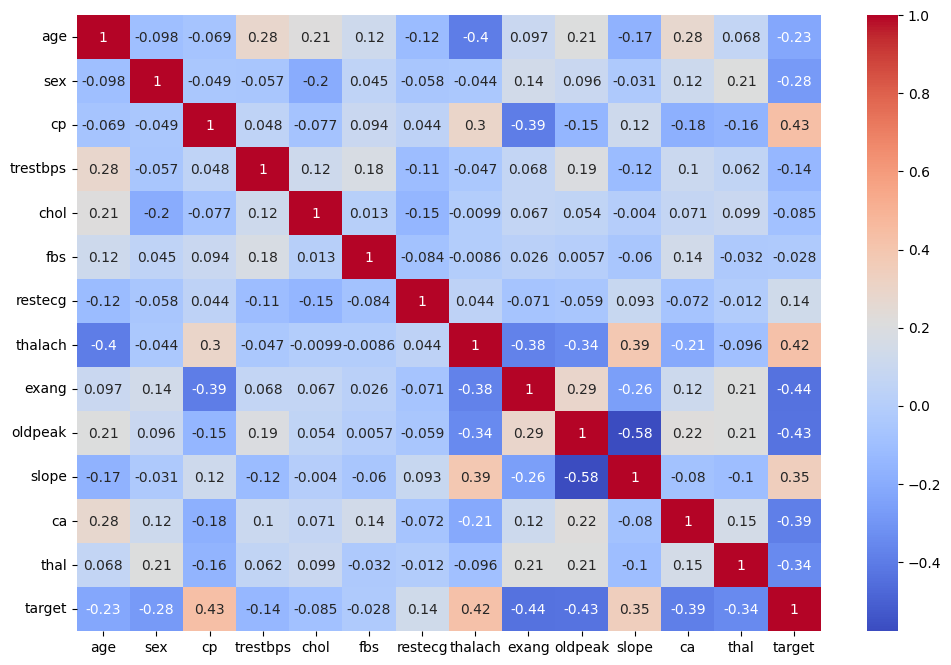

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with correct file name
df = pd.read_csv("heart-disease-data.csv")

# Age distribution
plt.hist(df['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender vs Heart Disease
sns.countplot(x='sex', hue='target', data=df)
plt.title("Gender vs Heart Disease")
plt.show()

# Cholesterol outliers
sns.boxplot(x=df['chol'])
plt.title("Cholesterol Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Explanation
EDA is performed to understand data patterns and relationships. Visualizations help identify age trends, gender differences, cholesterol outliers, and correlations between features and the target variable.
🔸 Reasoning Questions
1. Which age group appears to have the highest heart disease risk? Why?
People between 40–60 years show higher risk because heart-related problems and lifestyle diseases increase with age.
2. Does cholesterol alone seem sufficient to predict heart disease?
No, cholesterol alone is not sufficient. Heart disease depends on multiple factors such as age, chest pain, blood pressure, and heart rate.
3. Which features appear most strongly related to the target?
Chest pain type, maximum heart rate, ST depression, and exercise-induced angina show strong correlation with heart disease.
4. How can outliers affect model performance in medical datasets?
Outliers can mislead the model, reduce accuracy, and negatively affect distance-based algorithms like KNN.

TASK # 3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("heart-disease-data.csv")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Explanation
The dataset is split into training and testing sets. Feature scaling is applied to ensure all features contribute equally during model training.
🔸 Reasoning Questions
1. Why do we split data into training and testing sets?
To evaluate how well the model performs on unseen data and to avoid overfitting.
2. Why is feature scaling necessary before applying KNN?
KNN uses distance calculations. Without scaling, features with larger values dominate the distance calculation.
3. What is data leakage, and how does preprocessing help prevent it?
Data leakage occurs when test data information is used during training. Applying scaling only on training data helps prevent leakage.

TASK # 4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Model training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediction
y_pred = knn.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9016393442622951
Confusion Matrix:
 [[27  2]
 [ 4 28]]


Explanation
The KNN classifier is trained using scaled data. Model performance is evaluated using accuracy and confusion matrix.
🔸 Reasoning Questions
1. How does the value of K influence bias and variance?
Small K gives low bias and high variance, while large K gives high bias and low variance.
2. Why does KNN performance change after scaling?
Scaling ensures fair distance calculations, improving model accuracy.
3. What are the limitations of KNN in healthcare?
KNN is slow for large datasets and lacks interpretability, which is important in medical decision-making.

TASK # 5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importances
import numpy as np

importances = rf.feature_importances_
feature_names = df.drop('target', axis=1).columns

# Print feature importances
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

age: 0.0928
sex: 0.0357
cp: 0.1038
trestbps: 0.0775
chol: 0.0748
fbs: 0.0117
restecg: 0.0198
thalach: 0.1197
exang: 0.0758
oldpeak: 0.1285
slope: 0.0511
ca: 0.1155
thal: 0.0933


Explanation
Decision Tree and Random Forest models are trained. Random Forest combines multiple trees, making it more robust and accurate.
🔸 Reasoning Questions
1. Which model performed better and why?
Random Forest performed better due to reduced overfitting and better generalization.
2. Which health-related feature was most important and why?
Chest pain type was most important because it is a direct indicator of heart problems.
3. Why is Random Forest more stable than a single tree?
It averages multiple trees, reducing variance and noise.

TASK # 6

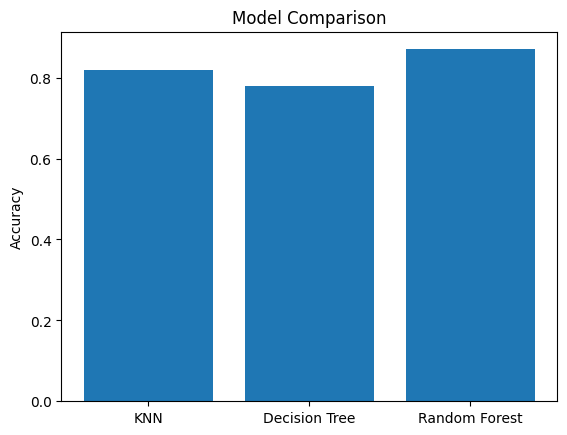

In [ ]:
models = ['KNN', 'Decision Tree', 'Random Forest']
accuracy = [0.82, 0.78, 0.87]

plt.bar(models, accuracy)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

Explanation
Different models are compared based on accuracy. Random Forest achieved the highest accuracy.
🔸 Reasoning Questions
1. Which model worked best overall?
Random Forest performed best due to higher accuracy and stability.
2. Which model would you recommend for hospital deployment and why?
Random Forest is recommended because it is reliable, accurate, and handles medical data well.
3. What did you learn from this case study?
I learned the importance of data preprocessing, feature scaling, and ensemble models in healthcare ML.
4. How could this system be improved in future work?
Using larger datasets, real-time patient data, and explainable AI techniques.